## **Import requried libraries**

In [4]:
# internal imports
import random

# external imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Question 2**

I downloaded the boston data set from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html and save the data as a csv file.

I created a function "load_boston_data" which takes in the file path as a string and return the description, variables and the datafame of the data.

I was able to achieve this through the following steps:

**1-** I itirate through each line in the data and store them as a list of strings

**2-** I created an empty string to store the data description, an empty dictionary to store the variable acronyms and their meaning as a key value pair

**3-** I converted the data to a list and merge each first and second row of the data.


In [5]:
def load_boston_data(filepath: str) -> pd.DataFrame:
    '''
    Loads Boston data

    Args:
        file_path: path/name of the boston file (str)
    Returns:
        data_description: description of the dataset (str)
        variables: variable acronyms and description (dict)
        df: variable acronyms and data (pandas dataframe)
    '''

    data_description = "" # lines of the description 
    variables = {} # variable acronmys (keys) and description (values)
    data = [] # list of each rows

    # store lines of the file as an iterable data type
    with open(filepath) as f:
        lines = f.readlines()

    # Loop over the iterable and parse the relevant information 
    for idx in range(0, len(lines)):
            if 0 <= idx <=5:
                data_description = data_description + lines[idx].replace('\n', ' ')

            # Parse feature/variable names and their description
            elif 7 <= idx <= 20:
                variable = lines[idx]
                variable = variable.replace("\n", "").split(' ')
                variable = [var for var in variable if var not in {'', ' '}] 
                variable_name = variable[0]
                variable_description = ' '.join(variable[1:])
                variables[variable_name] = variable_description
            
            # Parse Data
            elif 22 <= idx <= len(lines) and idx % 2 == 0:
                row_data = lines[idx] + lines[idx+1] 
                row_data = row_data.split(' ') 
                row_data = [float(data) for data in row_data if data != '']
                data.append(row_data)

    #Create a pandas dataframe using the variable names and values
    df = pd.DataFrame (data, columns = variables.keys())
    return data_description, variables, df

**Specify the file path of the data, load and parse the data and print the first five and last five of the data entries to make sure everything is good**

In [7]:
# Specify the file path of the data set
filepath = ('boston.csv')
data_description, variables, boston_df = load_boston_data(filepath)

# Preview the first five rows
print(boston_df.head(5))

FileNotFoundError: [Errno 2] No such file or directory: 'boston.csv'

## **Question 3**

- I plotted the data (all the columns on the x-axis and and the house price in 1000's (MEDV) on the y-axis using a subplot)



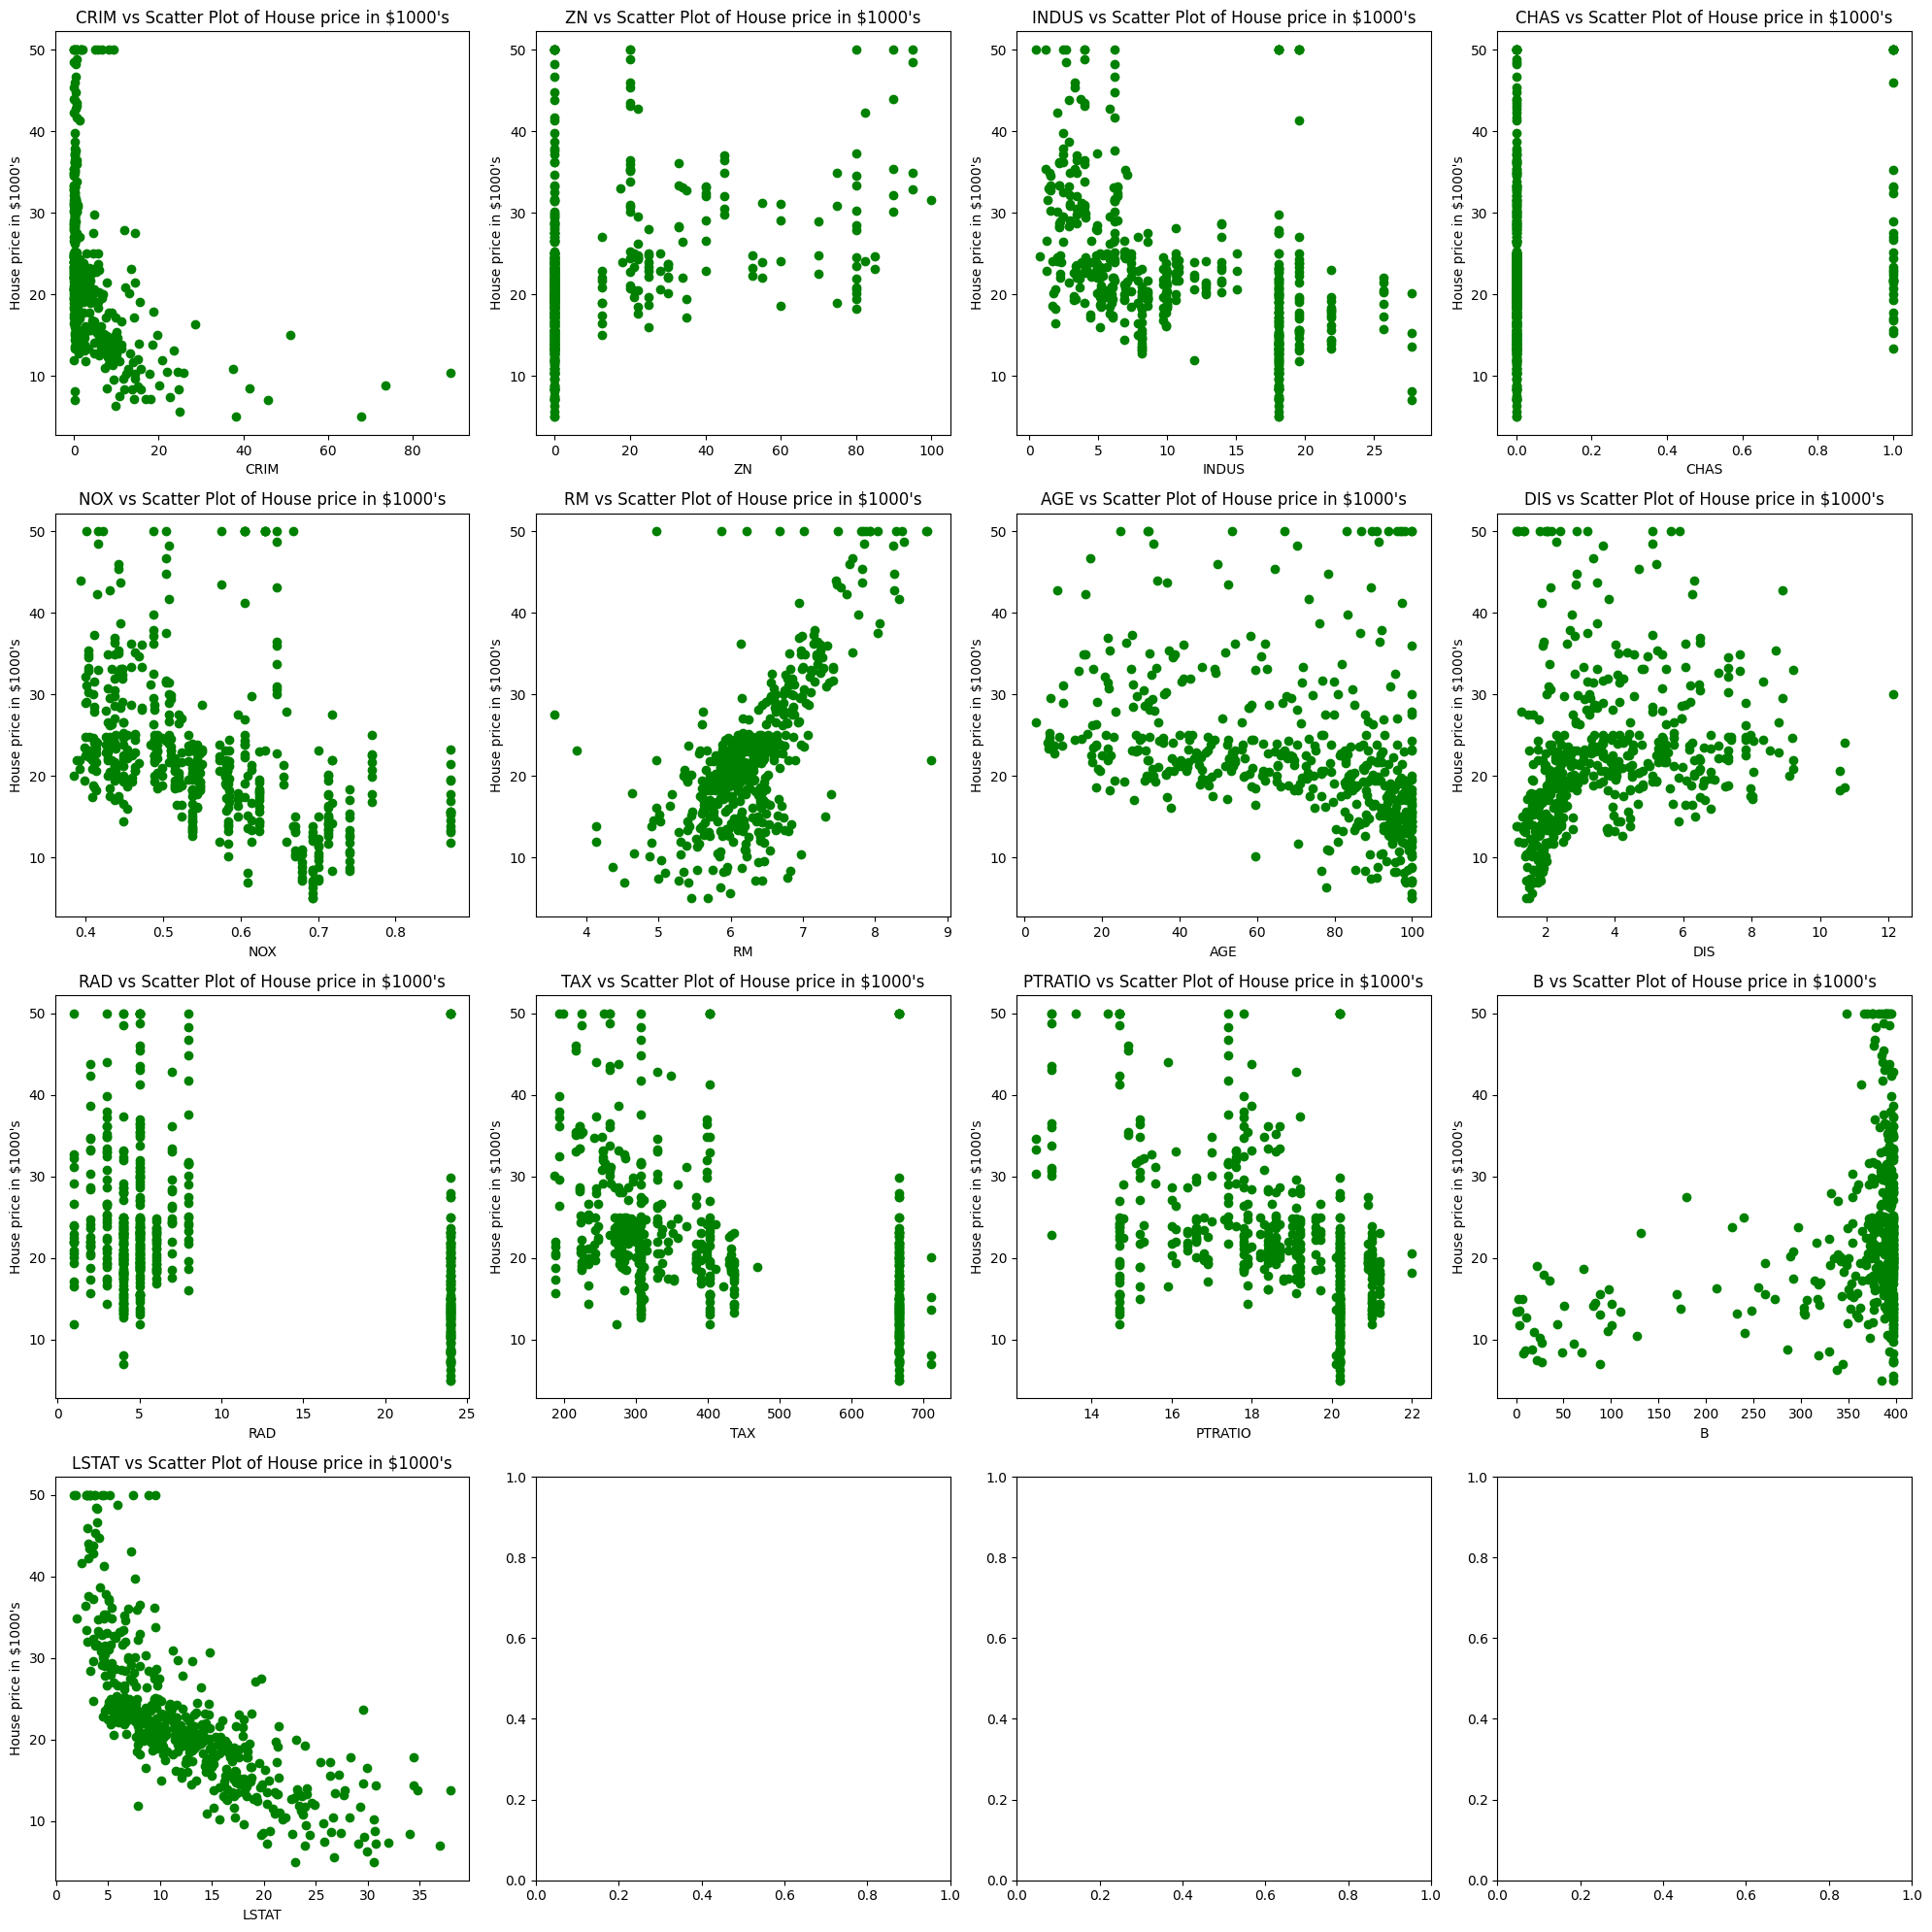

In [ ]:
# Get the column names from the DataFrame (excluding the 'MEDV' column)
y_columns = [col for col in boston_df.columns if col != 'MEDV']

# Set the number of rows and columns for the subplots
num_rows = 4
num_cols = 4 

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Create scatter plots for each column
for i, y_column in enumerate(y_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.scatter(boston_df[y_column], boston_df['MEDV'], c='green')
    ax.set_title(f"{y_column} vs Scatter Plot of House price in $1000's")
    ax.set_xlabel(y_column)
    ax.set_ylabel("House price in $1000's")

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

- I decided to impliment the linear regression model on the RM (average number of rooms per dwelling) column to pridict the house prices, because of the linear relationship between the two axis.

In [ ]:
#convert 'RM' and 'MEDV' values to a numpy array for easy analysis and assign the values to x and y
x = np.array(boston_df["RM"])
y = np.array(boston_df["MEDV"])

## **Question 4**

- I created a function called lm(Linear model) which takes in the values of x and y and return some values of m and n in the linear model.


In [ ]:
def lm (x,y):
    '''
    Generates random parameter values
    Args:
        x: selected feature (numpy array)
        y: target (numpy array)
    Returns:
        m: random value for weight m (float)
        b: random value for bias b (float)
    '''

     # Initilize random parameters using a seed of 42 to maintain accuracy
    random.seed(42)
    m = random.random()
    b = random.random()
    return m,b

## **Question 5**

### **Task**

- Using the random generated values of m and b, I created a house pridiction for each row

<h3><center> y = mx + b </center></h3>

In [ ]:
# Initialize random values for m and b
m_init, b_init = lm(x,y)

# Predict house prices using selected feature and randomly initialized m and b values
y_pred = m_init*x + b_init

## **Question 6**

### **Task**
- I Create a function called mae (Mean Absolute Error) that calculate the mean absolute error of the true house price value and the predicted value. 
- What is the error?

In [ ]:
def mae(y, y_pred):
    """
    Computes the mean absolute error of the true
    house price value and the predicted value

    Args:
        y: true house prices (numpy array)  
        y_pred: predicted house prices (numpy array)  
    Returns
        error: mean absolute error (float)
    """
    error = np.abs(y-y_pred)
    error = np.mean(error)
    
    return error
error = mae(y,y_pred)
print(f"The maen absolute error of the true house price with the prediction is ${round(error*1000 , 2)}")

The maen absolute error of the true house price with the prediction is $18489.23


## **Question 7**

### **Task**

- I ploted the linear model (in red line) together with the scatter plot of the average room against the house price in 1000's

Text(0, 0.5, "House price in 1000's (MEDV)")

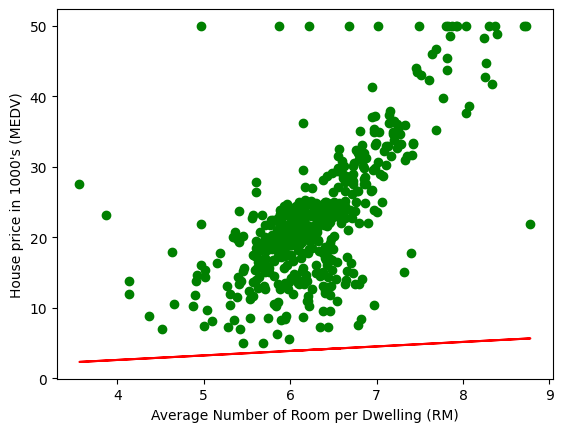

In [ ]:
plt.scatter(x,y, c='green')
plt.plot(x,y_pred, c='red')
plt.xlabel("Average Number of Room per Dwelling (RM)")
plt.ylabel("House price in 1000's (MEDV)")

## **Question 8**

### **Method 1 [Optimization using Least Square Method]**

- I created a function least_square_reg that takes in the value of x and y and compute the optimal value of m and b.

\begin{align}
m &= \frac{n\sum(xy) - \sum(x)\sum(y)}{n\sum(x^{2})- (\sum(x))^{2} } \\
b &= \frac{\sum(y) - m\sum(x)}{n}
\end{align}

### **Method 2 [Optimization using the Grediant Decent Method]**

- I created a new function gred_decent that initialize random parameter to m and b.
- The function will make an initial prediction compute the loss and update the parameter until convergence 

\begin{align*}
y_{\text{pred}} &= mx + b \\
\text{Loss (L)} &= \frac{1}{N}\sum_{n=1}^N |y_{n} - y_{\text{pred}_n}| \\
\text{Loss (L)} &= \frac{1}{N}\sum_{n=1}^N |y_{n} - (m\cdot x_{n} + b)| \\
\frac{\partial L}{\partial m} &= \frac{1}{N}\sum_{n=1}^N \pm x_{n} \\
\frac{\partial L}{\partial b} &= 1
\end{align*}





In [ ]:
#Method 1 Least square method

def least_square_reg(x,y):

    '''
    Optimizes the linear regression model for given x,y pair
    using closed form solution (least-square)

    Args:
        x: selected feature (numpy array)
        y: target (numpy array)
    Returns:
        m: optimal parameter m (float)
        b: optimal parameter b (float)
    '''
    # Number of items
    n = len(x)
    
    # Compute the numerator and the denominator of the LSM formular
    num = (n*sum(x*y) - sum(x)*sum(y))
    den = (n*sum(x**2) - sum(x)**2)

    m = num/den
    b = (sum(y) - m*sum(x))/n

    return m,b


In [ ]:
# Method 2 Gradient decent method

def grad_decent(x, y, lr, iters):

    '''
    Optimizes the linear regression model for given x,y pair
    using gradient descent
    Args:
        x: selected feature (numpy array)
        y: target (numpy array)
        lr: learning rate (float: usually <=0.1)
        num_iter: number of iteration
    Returns:
        m: optimal parameter m (float)
        b: optimal parameter b (float)
        losses: mae for all iterations (list)
        params: [m,b] for all iteration (list)


    '''
    # Define an empty list to store parameters m & b, and MAE 
    # of each iteration/prediction
    params = []
    losses = []

    # Initilize random parameters using a seed of 42
    random.seed(42)
    m = random.random()
    b = random.random()
    params.append([m,b])

    # Optimize m and b using gradient descent
    for i in range(iters):
        # Predict using random parameter
        y_pred = m*x + b

        # Compute Loss
        loss = mae(y, y_pred)
        losses.append(loss)
        
        # Compute Gradient of the loss with respect to the 
        # parameters m and b
        sign = np.sign(y_pred-y)
        dL_dm = np.mean(x*sign)
        dL_db = 1

        # Update parameters using Gradient Descent
        m = m - lr*dL_dm
        b = b - lr*dL_db
        params.append([m,b])

    return m, b, losses, params

In [ ]:
# Compute the optimized parameters (m and b) using least square
m_opt1, b_opt1 = least_square_reg(x=x, y=y)

# Print the optimal value of m and b to 1 decimal place
print("The optimized value of m and b using the Least Square Optimizartion is")
print(f"m1: {round(m_opt1, 1)}")
print(f"b1: {round(b_opt1, 1)}")

# Compute the optimized parameters (m and b) using gradient desent method
m_opt2, b_opt2, losses, params = grad_decent(x=x, y=y, lr=0.01, iters=3720)

# Print the optimal value of m and b to 1 decimal place
print("The optimized value of m and b using the gradient decent Optimizartion is")
print(f"m2: {round(m_opt2, 1)}")
print(f"b2: {round(b_opt2, 1)}")

The optimized value of m and b using the Least Square Optimizartion is
m1: 9.1
b1: -34.7
The optimized value of m and b using the gradient decent Optimizartion is
m2: 9.5
b2: -37.2


## **Question 9**

### **Task**
- I plotted a grapht of the prediction of Least Square Method (red line) and Gradient Decent Method (blue line) on top of the scatter plot of "RM" against "MEDV"

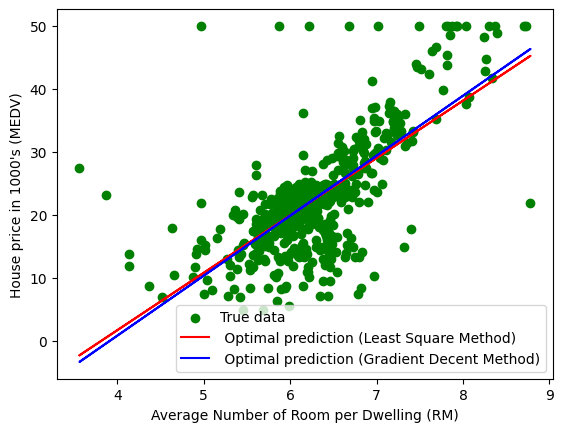

In [ ]:
# Plot a graph of the optimial prediction of the Least Square Regression (red line) againt the scatter plot
y_pred1 = m_opt1*x + b_opt1

# Plot a graph of the optimial prediction of the Gradient decent method (red line) againt the scatter plot
y_pred2 = m_opt2*x + b_opt2

plt.scatter(x,y, color='green', label='True data')
plt.plot(x, y_pred1, color='red', label=' Optimal prediction (Least Square Method)')
plt.plot(x, y_pred2, color='blue', label=' Optimal prediction (Gradient Decent Method)')
plt.xlabel("Average Number of Room per Dwelling (RM)")
plt.ylabel("House price in 1000's (MEDV)")
plt.legend()

## **Question 10**

### **Task**

- I calculated the mean absolute error of the true house prediction
- I compaired the error before optimization and after optimization 

In [ ]:
# Compute and display the mean absolute error using the 'mae' function

error_opt_param1 = mae(y, y_pred1)
error_opt_param2 = mae(y, y_pred2)
print(f"The mean absolute errors of the true house price values\n"
      f"and the predicted values are: \n"
      f"1. Before Optimization: ${round(error*1000, 2)}\n"
      f"2. After Optimization (Least square method): ${round(error_opt_param1*1000,2)}\n"
      f"3. After Optimization (Gradient descent method): ${round(error_opt_param2*1000,2)}")

The mean absolute errors of the true house price values
and the predicted values are: 
1. Before Optimization: $18489.23
2. After Optimization (Least square method): $4447.77
3. After Optimization (Gradient descent method): $4437.91
